#Part 1

In [56]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from scipy.stats import ttest_ind

In [57]:
#Creating necessary dataframes for cases, deaths, and populations
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
cases_covid=pd.DataFrame(covid_cases_data)
cases_covid.head()

covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
deaths_covid=pd.DataFrame(covid_deaths_data)
deaths_covid.head()

populations_covid = pd.read_csv('covid_county_population_usafacts.csv')
super_covid = pd.read_csv('super_covid_data-1.csv')

In [58]:
cases_covid.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [59]:
#Finding the top 5 counties in Vermont that have higher amount of Cases and Deaths
cases_covid_data = pd.read_csv("covid_confirmed_usafacts.csv")
deaths_covid_data = pd.read_csv("covid_deaths_usafacts.csv")


cases_vermont = cases_covid_data[cases_covid_data['State'] == 'VT'].copy()
deaths_vermont = deaths_covid_data[deaths_covid_data['State'] == 'VT'].copy()

#Date range from June (Monday) to Jan (Sunday)
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()

#making a date range for cases and deaths
cases_vermont[date_range] = cases_vermont[date_range].astype(int)
deaths_vermont[date_range] = deaths_vermont[date_range].astype(int)

cases_vermont['Total Cases'] = cases_vermont[date_range].sum(axis=1)
deaths_vermont['Total Deaths'] = deaths_vermont[date_range].sum(axis=1)

# Top 5 counties in Vermont with the highest number of Cases and Deaths
top_5_cases = cases_vermont.sort_values(by='Total Cases', ascending=False).head(5)
top_5_deaths = deaths_vermont.sort_values(by='Total Deaths', ascending=False).head(5)

print("Top 5 counties in Vermont by total cases:")
print(top_5_cases[['County Name', 'Total Cases']])
print("\nTop 5 counties in Vermont by total deaths:")
print(top_5_deaths[['County Name', 'Total Deaths']])


Top 5 counties in Vermont by total cases:
             County Name  Total Cases
2855  Chittenden County        224813
2863  Washington County         48576
2857    Franklin County         37665
2864     Windham County         34698
2862     Rutland County         32725

Top 5 counties in Vermont by total deaths:
             County Name  Total Deaths
2855  Chittenden County           9007
2857    Franklin County           1808
2864     Windham County            727
2863  Washington County            488
2862     Rutland County            484


C:\Users\sarve\AppData\Local\Temp\ipykernel_28912\2036032555.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cases_vermont['Total Cases'] = cases_vermont[date_range].sum(axis=1)
C:\Users\sarve\AppData\Local\Temp\ipykernel_28912\2036032555.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  deaths_vermont['Total Deaths'] = deaths_vermont[date_range].sum(axis=1)


In [60]:
#Calculating the RMSE of top 5 counties for Cases and Deaths
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Function to calculate the number of new cases and deaths per day
def calculate_daily_stats(data):
    return data.diff(axis=1).fillna(0)

# Fitting Linear Regression and calculating RMSE
def fit_linear_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    rmse = calculate_rmse(y, predictions)
    return model, rmse

# Read the top 5 counties data
top_5_cases_data = top_5_cases.set_index('County Name')[date_range]
top_5_deaths_data = top_5_deaths.set_index('County Name')[date_range]

# Calculate daily new cases and deaths for the top 5 counties
daily_new_cases = calculate_daily_stats(top_5_cases_data)
daily_new_deaths = calculate_daily_stats(top_5_deaths_data)

# Linear regression model and RMSE for cases and deaths
county_cases_models = {}
county_deaths_models = {}
county_rmse_cases = {}
county_rmse_deaths = {}

for county in top_5_cases_data.index:
    county_data_cases = daily_new_cases.loc[county]
    county_data_deaths = daily_new_deaths.loc[county]

    cases_model, rmse_cases = fit_linear_regression(county_data_cases)
    deaths_model, rmse_deaths = fit_linear_regression(county_data_deaths)

    county_cases_models[county] = cases_model
    county_deaths_models[county] = deaths_model
    county_rmse_cases[county] = rmse_cases
    county_rmse_deaths[county] = rmse_deaths


print("RMSE for number of new cases:")
for county, rmse_cases in county_rmse_cases.items():
    print(f"{county}: {rmse_cases}")

print("\nRMSE for number of new deaths:")
for county, rmse_deaths in county_rmse_deaths.items():
    print(f"{county}: {rmse_deaths}")


RMSE for number of new cases:
Chittenden County : 12.559009688440227
Washington County : 7.847502467948233
Franklin County : 3.6096739077663207
Windham County : 3.6466164589101058
Rutland County : 2.958054776841664

RMSE for number of new deaths:
Chittenden County : 0.4555612787987821
Washington County : 0.20680674357788295
Franklin County : 0.37236154273000976
Windham County : 0.13505224247812905
Rutland County : 0.19774390568013306


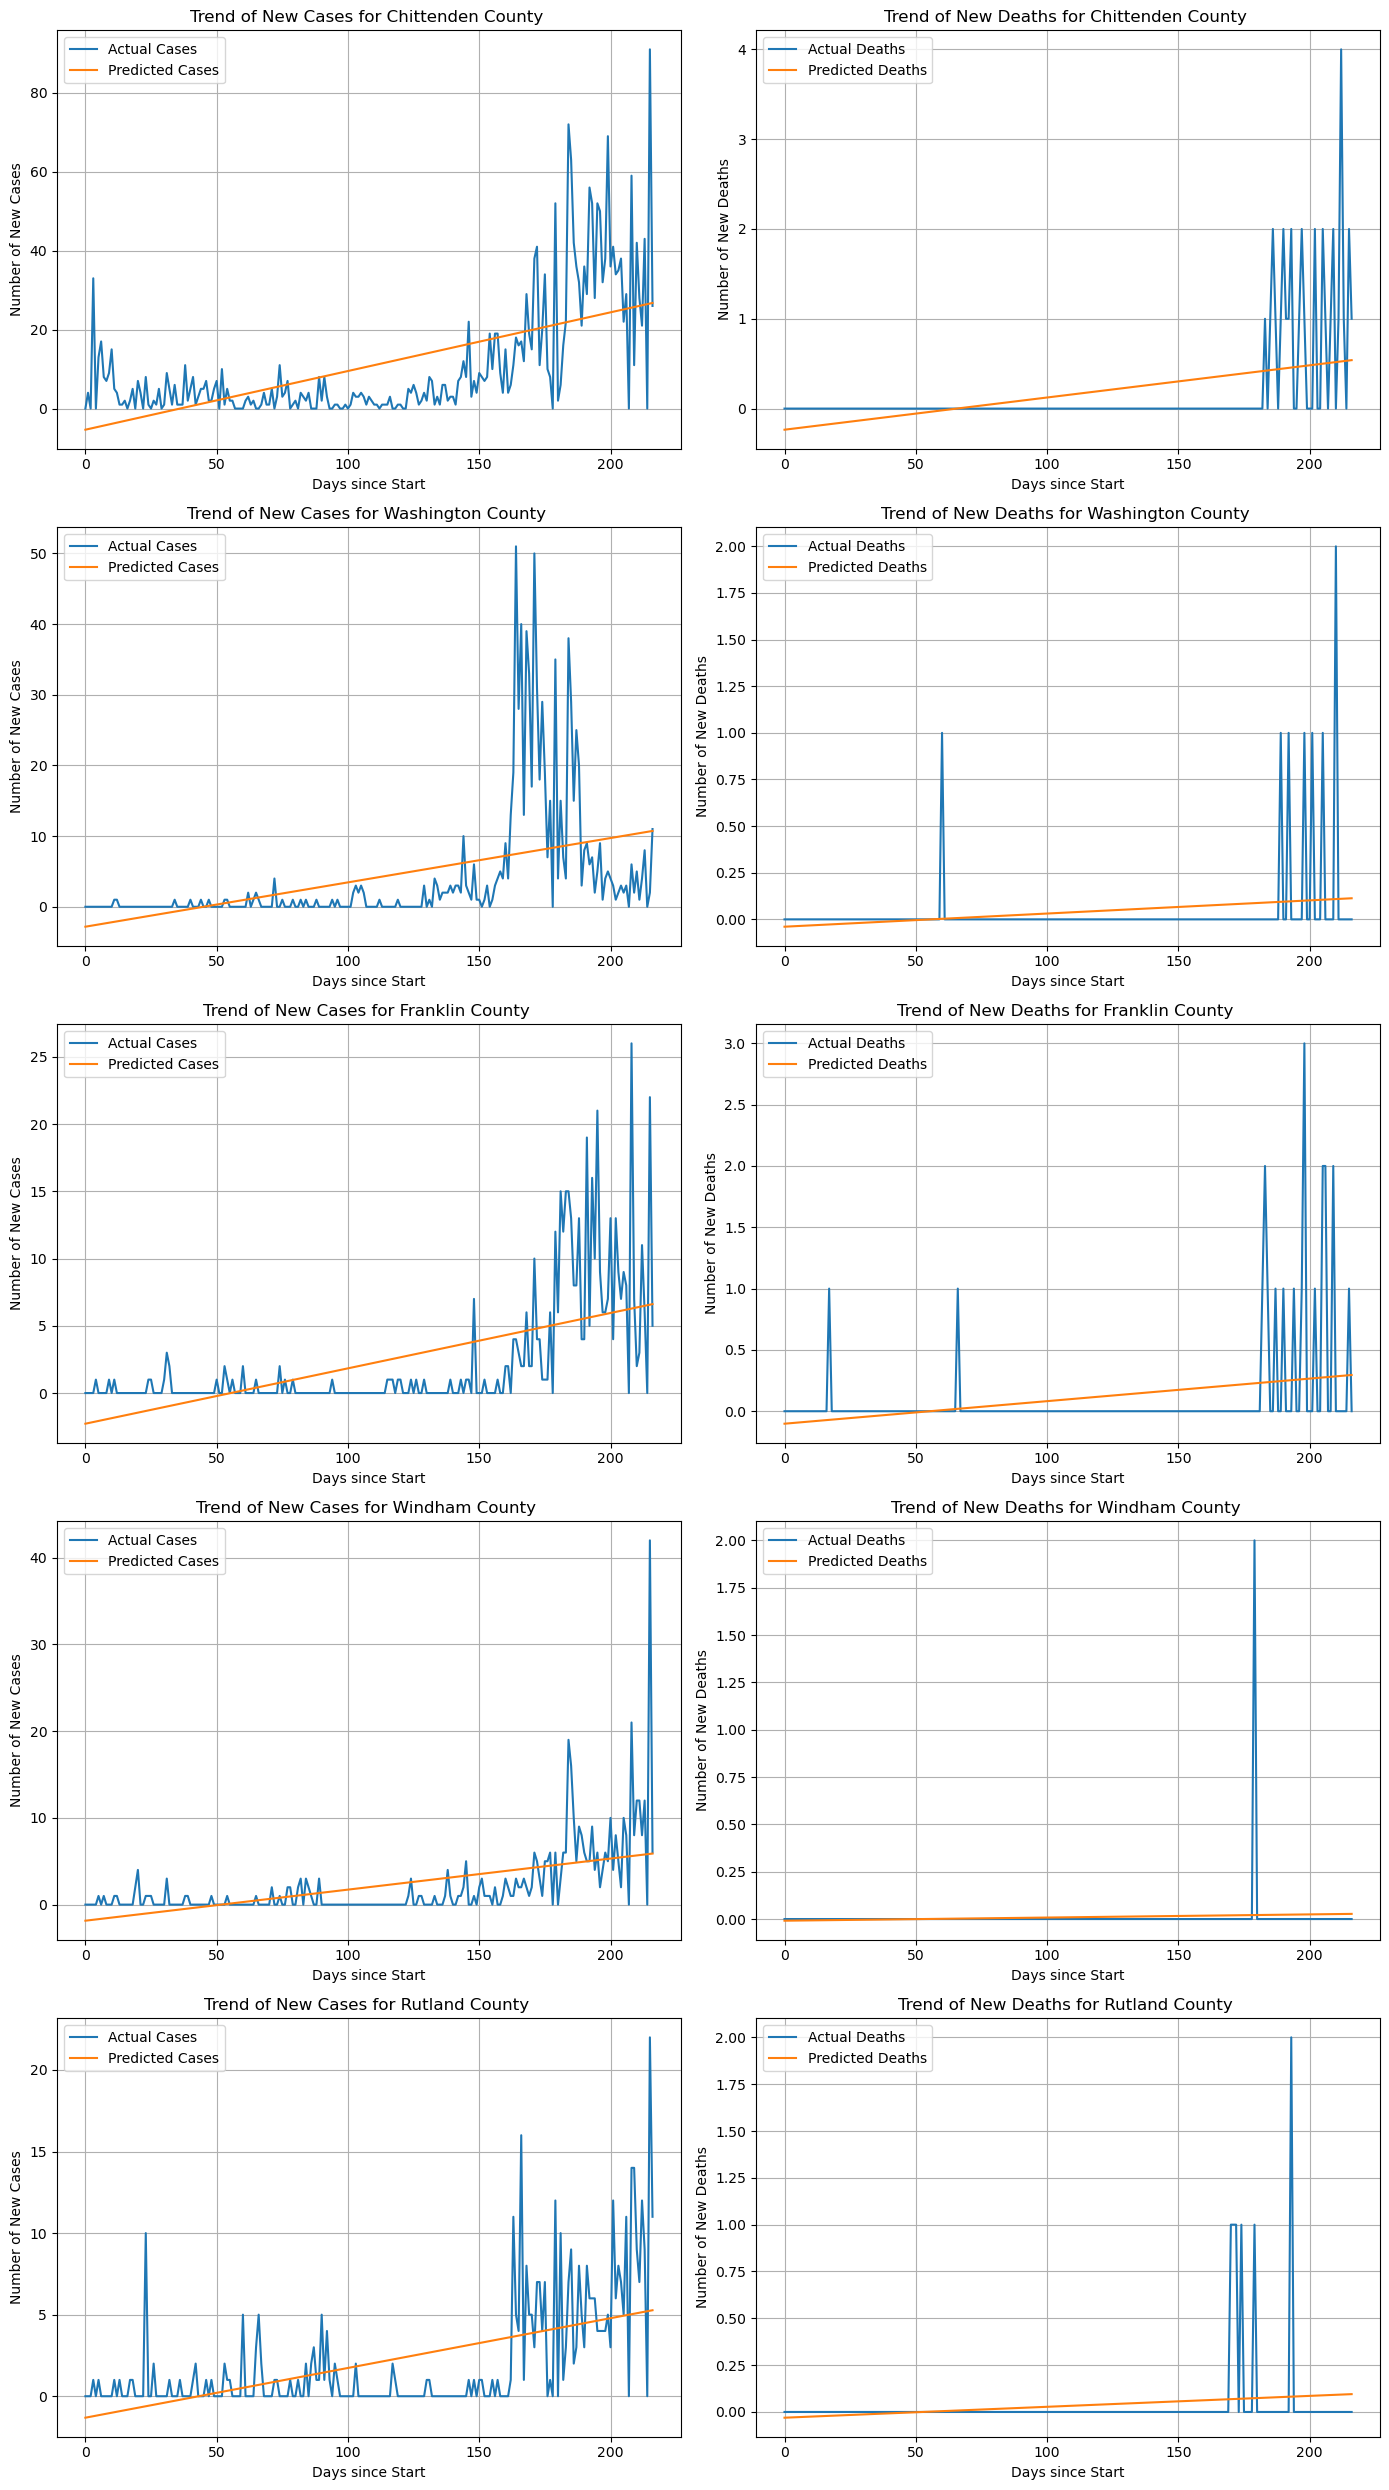

In [61]:
# Define the start and end dates
start_date = "2020-06-01"
end_date = "2021-01-03"

# Calculate the total number of days between the start and end dates
total_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

# Create the date range
date_range = pd.date_range(start_date, periods=total_days).strftime('%Y-%m-%d').tolist()

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Function to calculate the number of new cases and deaths per day
def calculate_daily_stats(data):
    return data.diff(axis=1).fillna(0)

# Function to fit Linear Regression model and calculate RMSE
def fit_linear_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    rmse = calculate_rmse(y, predictions)
    return model, rmse

# Read the top 5 counties data
top_5_cases_data = top_5_cases.set_index('County Name')[date_range]
top_5_deaths_data = top_5_deaths.set_index('County Name')[date_range]

# Calculate daily new cases and deaths for the top 5 counties
daily_new_cases = calculate_daily_stats(top_5_cases_data)
daily_new_deaths = calculate_daily_stats(top_5_deaths_data)

# Fit Linear Regression models and calculate RMSE for each county
county_cases_models = {}
county_deaths_models = {}
county_rmse_cases = {}
county_rmse_deaths = {}

for county in top_5_cases_data.index:
    county_data_cases = daily_new_cases.loc[county]
    county_data_deaths = daily_new_deaths.loc[county]

    cases_model, rmse_cases = fit_linear_regression(county_data_cases)
    deaths_model, rmse_deaths = fit_linear_regression(county_data_deaths)

    county_cases_models[county] = cases_model
    county_deaths_models[county] = deaths_model
    county_rmse_cases[county] = rmse_cases
    county_rmse_deaths[county] = rmse_deaths

# Create subplots for each county
num_counties = len(top_5_cases_data.index)
fig, axs = plt.subplots(num_counties, 2, figsize=(14, 5*num_counties))

# Plot trends for each county. Cases on the left, Deaths on the right
for i, county in enumerate(top_5_cases_data.index):
    # Plot trend for cases
    model_cases = county_cases_models[county]
    axs[i, 0].plot(np.arange(total_days), daily_new_cases.loc[county].values, label='Actual Cases')
    axs[i, 0].plot(np.arange(total_days), model_cases.predict(np.arange(total_days).reshape(-1, 1)), label='Predicted Cases')
    axs[i, 0].set_xlabel('Days since Start')
    axs[i, 0].set_ylabel('Number of New Cases')
    axs[i, 0].set_title(f'Trend of New Cases for {county}')
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    #axs[i, 0].xaxis.set_major_formatter(plt.NullFormatter())

    # Plot trend for deaths
    model_deaths = county_deaths_models[county]
    axs[i, 1].plot(np.arange(total_days), daily_new_deaths.loc[county].values, label='Actual Deaths')
    axs[i, 1].plot(np.arange(total_days), model_deaths.predict(np.arange(total_days).reshape(-1, 1)), label='Predicted Deaths')
    axs[i, 1].set_xlabel('Days since Start')
    axs[i, 1].set_ylabel('Number of New Deaths')
    axs[i, 1].set_title(f'Trend of New Deaths for {county}')
    axs[i, 1].legend()
    axs[i, 1].grid(True)
    #axs[i, 1].xaxis.set_major_formatter(plt.NullFormatter())

plt.tight_layout()
plt.show()


In [62]:
president_data = pd.read_csv('president_county_candidate.csv')

president_data.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [63]:
vermont_enrichment_data = president_data[president_data['state'] == 'Vermont']

vermont_enrichment_data.head()

,state,county,candidate,party,total_votes,won
20951,Vermont,Jamaica,Joe Biden,DEM,406,True
20952,Vermont,Jamaica,Donald Trump,REP,149,False
20953,Vermont,Jamaica,Jo Jorgensen,LIB,6,False
20954,Vermont,Jamaica,Howie Hawkins,GRN,5,False
20955,Vermont,Jamaica,Write-ins,WRI,5,False


#Hypothesis
##COVID-19 Impact on Political Elections:
Null Hypothesis: The number of COVID-19 cases in a region has no effect on voter turnout or election outcomes.
Alternative Hypothesis: Regions with higher COVID-19 cases experience lower vote turnout or different election outcomes compared to regions with lower case counts.

##Political Elections Impact on COVID-19 Cases:
Null Hypothesis: The occurrence of political elections in a region does not affect the spread or severity of COVID-19 cases.
Alternative Hypothesis: Regions that hold political elections experience changes in COVID-19 case trends, such as increased transmission rates or higher case counts, compared to regions without elections.

##Mutual Impact of COVID-19 Cases and Political Elections:
Null Hypothesis: There is no relationship between COVID-19 case numbers and political elections; they occur independently of each other.
Alternative Hypothesis: There is a bi-directional relationship between COVID-19 case numbers and political elections, where higher case numbers influence election dynamics and election-related activities impact COVID-19 transmission rates.


In [67]:
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter COVID-19 cases data for Vermont
cases_ver = covid_cases_data[covid_cases_data['State'] == 'VT']

start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()

cases_vermont = cases_ver[['countyFIPS', 'County Name', 'State'] + date_range]

vermont_enrichment_data = president_data[president_data['state'] == 'Vermont']

# Extract the 'total_votes' and 'county' columns
total_votes_county = vermont_enrichment_data[[ 'county', 'total_votes']]

cases = cases_vermont[date_range].sum(axis=1)
total_votes = total_votes_county['total_votes']

# Perform two-tail two-sample t-test: Telling the difference between both datasets
t_stat, p_val = ttest_ind(cases, total_votes, equal_var=False)
print("Two-tail two-sample t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Perform one-tail two-sample t-test (COVID-19 cases are higher or not)
t_stat, p_val = ttest_ind(cases, total_votes, alternative='greater', equal_var=False)
print("\nOne-tail two-sample t-test (COVID-19 cases are higher) results:")
print("t-statistic:", t_stat)
print("p-value:", p_val)


#president_data.head()
#total_votes_county.head()
#cases_vermont.head()

Two-tail two-sample t-test results:
t-statistic: 2.531737861682527
p-value: 0.023950232953301377

One-tail two-sample t-test (COVID-19 cases are higher) results:
t-statistic: 2.531737861682527
p-value: 0.011975116476650689


####When looking at the t-statistic, you can tell how big the difference is between the cases and enrichment data by the number shown. 
####The p-vlaue shows us if the difference is due to random chances or if its real. 
####If the p-value is less than 0.05, we usually say the difference is real.

#Part2

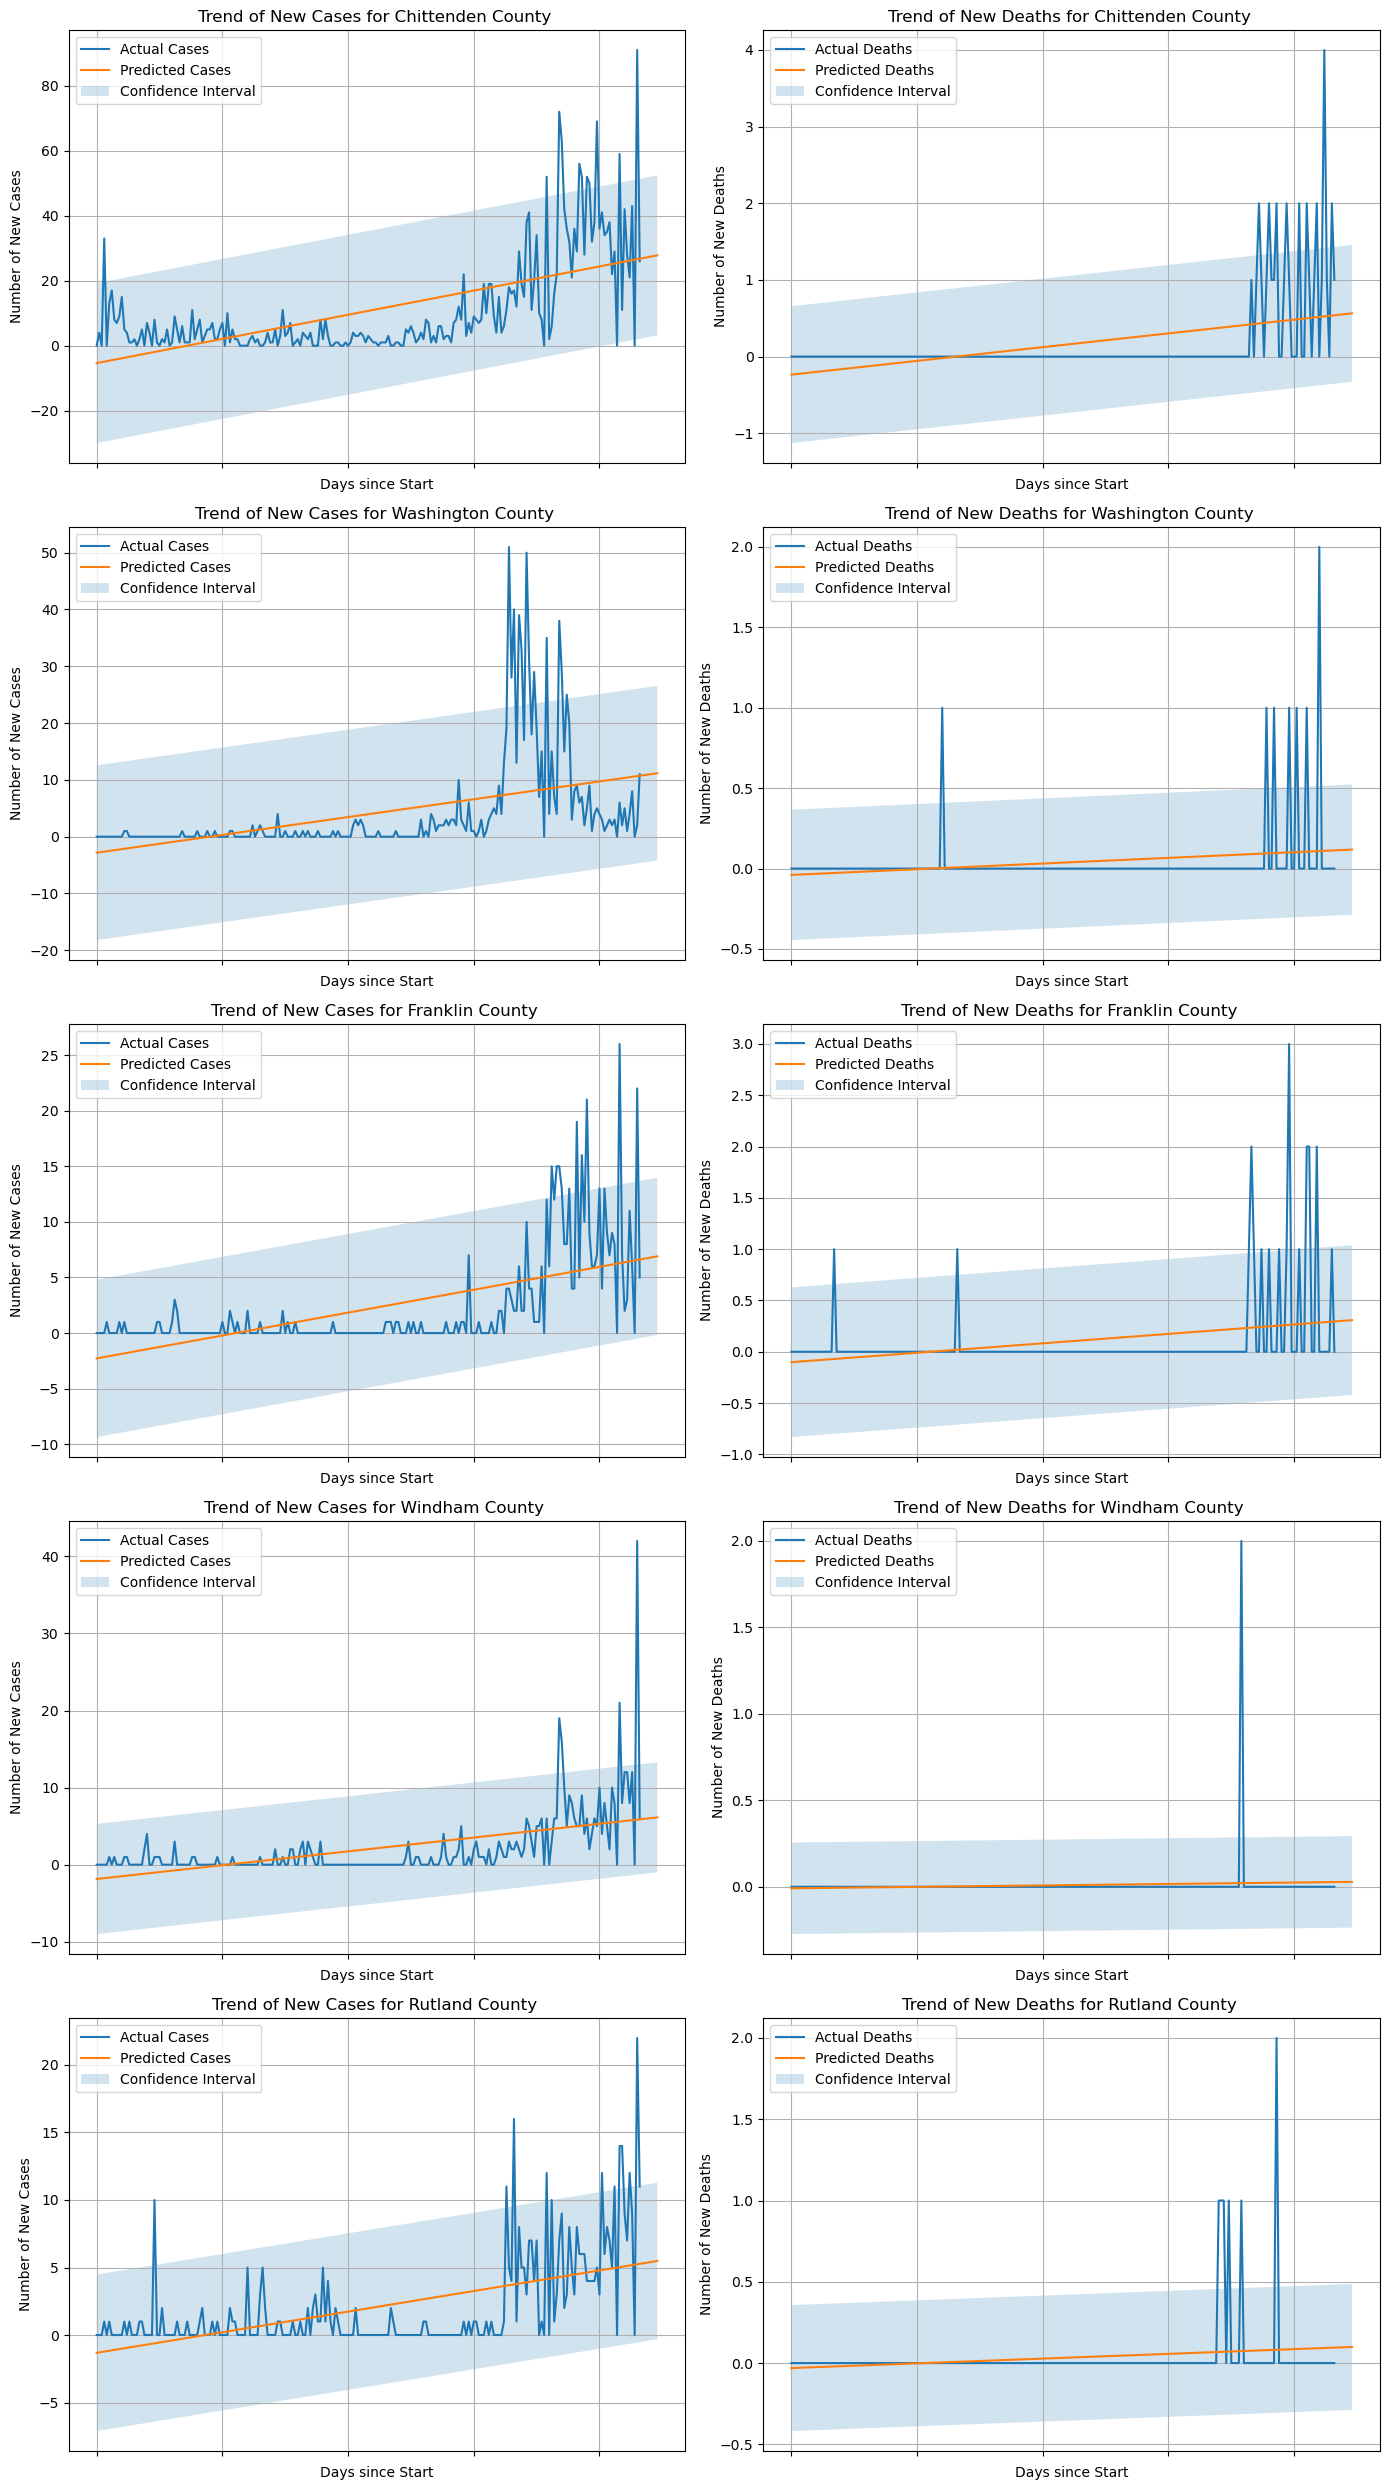

In [66]:
# Define the start and end dates
start_date = "2020-06-01"
end_date = "2021-01-03"

# Calculate the total number of days between the start and end dates
total_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

# Create the date range
date_range = pd.date_range(start_date, periods=total_days).strftime('%Y-%m-%d').tolist()

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Function to calculate the number of new cases and deaths per day
def calculate_daily_stats(data):
    return data.diff(axis=1).fillna(0)

# Function to fit Linear Regression model and calculate RMSE
def fit_linear_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    rmse = calculate_rmse(y, predictions)
    return model, rmse

# Read the top 5 counties data
top_5_cases_data = top_5_cases.set_index('County Name')[date_range]
top_5_deaths_data = top_5_deaths.set_index('County Name')[date_range]

# Calculate daily new cases and deaths for the top 5 counties
daily_new_cases = calculate_daily_stats(top_5_cases_data)
daily_new_deaths = calculate_daily_stats(top_5_deaths_data)

# Fit Linear Regression models and calculate RMSE for each county
county_cases_models = {}
county_deaths_models = {}
county_rmse_cases = {}
county_rmse_deaths = {}

for county in top_5_cases_data.index:
    county_data_cases = daily_new_cases.loc[county]
    county_data_deaths = daily_new_deaths.loc[county]

    cases_model, rmse_cases = fit_linear_regression(county_data_cases)
    deaths_model, rmse_deaths = fit_linear_regression(county_data_deaths)

    county_cases_models[county] = cases_model
    county_deaths_models[county] = deaths_model
    county_rmse_cases[county] = rmse_cases
    county_rmse_deaths[county] = rmse_deaths


num_counties = len(top_5_cases_data.index)
fig, axs = plt.subplots(num_counties, 2, figsize=(14, 5*num_counties))

# Plot trends for each county
for i, county in enumerate(top_5_cases_data.index):
    # Plot trend for cases
    model_cases = county_cases_models[county]
    predictions_cases = model_cases.predict(np.arange(total_days + 7).reshape(-1, 1)).flatten()
    axs[i, 0].plot(np.arange(total_days), daily_new_cases.loc[county].values, label='Actual Cases')
    axs[i, 0].plot(np.arange(total_days + 7), predictions_cases, label='Predicted Cases') 
    axs[i, 0].fill_between(np.arange(total_days + 7), predictions_cases - 1.96 * county_rmse_cases[county], predictions_cases + 1.96 * county_rmse_cases[county], alpha=0.2, label='Confidence Interval') # Adding in the confidence initerval
    axs[i, 0].set_xlabel('Days since Start')
    axs[i, 0].set_ylabel('Number of New Cases')
    axs[i, 0].set_title(f'Trend of New Cases for {county}')
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    axs[i, 0].xaxis.set_major_formatter(plt.NullFormatter())

    # Plot trend for deaths
    model_deaths = county_deaths_models[county]
    predictions_deaths = model_deaths.predict(np.arange(total_days + 7).reshape(-1, 1)).flatten()
    axs[i, 1].plot(np.arange(total_days), daily_new_deaths.loc[county].values, label='Actual Deaths')
    axs[i, 1].plot(np.arange(total_days + 7), predictions_deaths, label='Predicted Deaths')
    axs[i, 1].fill_between(np.arange(total_days + 7), predictions_deaths - 1.96 * county_rmse_deaths[county], predictions_deaths + 1.96 * county_rmse_deaths[county], alpha=0.2, label='Confidence Interval') # Adding in the confidence initerval
    axs[i, 1].set_xlabel('Days since Start')
    axs[i, 1].set_ylabel('Number of New Deaths')
    axs[i, 1].set_title(f'Trend of New Deaths for {county}')
    axs[i, 1].legend()
    axs[i, 1].grid(True)
    axs[i, 1].xaxis.set_major_formatter(plt.NullFormatter())

plt.tight_layout()
plt.show()
